#📌 Extracão

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

try:
    df = pd.read_json(url)
    
    print("Dados carregados com sucesso!")
    print(df.head())

except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")

Dados carregados com sucesso!
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber op

#🔧 Transformação

In [8]:
df_customer = pd.json_normalize(df['customer']).add_prefix('customer.')
df_phone = pd.json_normalize(df['phone']).add_prefix('phone.')
df_internet = pd.json_normalize(df['internet']).add_prefix('internet.')
df_account = pd.json_normalize(df['account']).add_prefix('account.')

df_transformado = pd.concat([
    df[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

df_transformado['account.Charges.Total'] = pd.to_numeric(df_transformado['account.Charges.Total'], errors='coerce')
df_transformado['account.Charges.Total'] = df_transformado['account.Charges.Total'].fillna(0)

print("--- Transformação Concluída ---")
print("Dados aninhados foram transformados em uma tabela plana e a coluna 'account.Charges.Total' foi limpa.")
print("\nVisualização do DataFrame Transformado:")
print(df_transformado.head())

print("\nVerificação Final dos Tipos de Dados:")
df_transformado.info()


--- Transformação Concluída ---
Dados aninhados foram transformados em uma tabela plana e a coluna 'account.Charges.Total' foi limpa.

Visualização do DataFrame Transformado:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  N

#📊 Carga e análise

--- ETAPA DE CARGA: VERIFICAÇÃO FINAL DOS DADOS ---

Resumo Estatístico das Colunas Numéricas:
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       account.Charges.Total  
count            7267.000000  
mean             2277.182035  
std              2268.648587  
min                 0.000000  
25%               396.200000  
50%              1389.200000  
75%         

C:\Users\luc_c\AppData\Local\Temp\ipykernel_49228\451325599.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_transformado, palette=['#5cb85c', '#d9534f'])
C:\Users\luc_c\AppData\Local\Temp\ipykernel_49228\451325599.py:16: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Churn', data=df_transformado, palette=['#5cb85c', '#d9534f'])


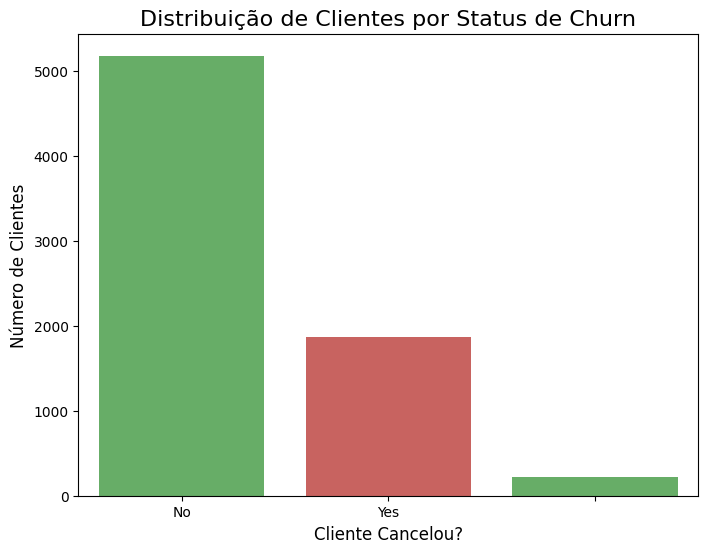



--- ETAPA DE ANÁLISE 2: CHURN vs TEMPO DE CONTRATO (TENURE) ---

Tempo Médio de Contrato (em meses) por Status de Churn:
Churn
       31.571429
No     37.569965
Yes    17.979133
Name: customer.tenure, dtype: float64


C:\Users\luc_c\AppData\Local\Temp\ipykernel_49228\451325599.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df_transformado, palette=['#5cb85c', '#d9534f'])
C:\Users\luc_c\AppData\Local\Temp\ipykernel_49228\451325599.py:30: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Churn', y='customer.tenure', data=df_transformado, palette=['#5cb85c', '#d9534f'])


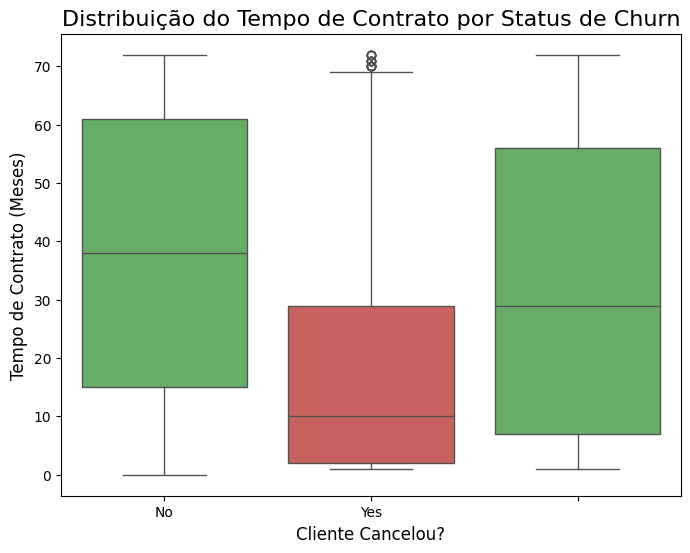

In [9]:
print("--- ETAPA DE CARGA: VERIFICAÇÃO FINAL DOS DADOS ---")
print("\nResumo Estatístico das Colunas Numéricas:")
print(df_transformado.describe())


print("\n\n--- ETAPA DE ANÁLISE 1: DISTRIBUIÇÃO DO CHURN ---")
churn_counts = df_transformado['Churn'].value_counts()
churn_percentage = df_transformado['Churn'].value_counts(normalize=True) * 100

print("\nContagem de Clientes por Status:")
print(churn_counts)
print("\nPercentual de Clientes por Status:")
print(churn_percentage)

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_transformado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribuição de Clientes por Status de Churn', fontsize=16)
plt.xlabel('Cliente Cancelou?', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()


print("\n\n--- ETAPA DE ANÁLISE 2: CHURN vs TEMPO DE CONTRATO (TENURE) ---")
avg_tenure_by_churn = df_transformado.groupby('Churn')['customer.tenure'].mean()

print("\nTempo Médio de Contrato (em meses) por Status de Churn:")
print(avg_tenure_by_churn)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_transformado, palette=['#5cb85c', '#d9534f'])
plt.title('Distribuição do Tempo de Contrato por Status de Churn', fontsize=16)
plt.xlabel('Cliente Cancelou?', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.show()

#📄Relatorio Final

# Relatório Final: Análise de Evasão de Clientes – Telecom X
## 1. Objetivo

O principal objetivo deste projeto foi coletar, tratar e analisar os dados de clientes da Telecom X para identificar os fatores que levam à evasão (Churn), fornecendo insights que possam guiar futuras estratégias de retenção.

## 2. Resumo das Etapas Executadas

O projeto seguiu um fluxo padrão de análise de dados (ETL e Análise Exploratória):

Extração: Os dados foram obtidos com sucesso a partir de uma fonte JSON. A estrutura inicial dos dados era aninhada, com informações de cliente, telefone, internet e conta agrupadas em dicionários.

Transformação: A etapa de transformação foi crucial para preparar os dados para a análise. As colunas aninhadas foram desmembradas (achatadas), resultando em um DataFrame com 21 colunas e 7.267 registros de clientes. Além disso, a coluna account.Charges.Total foi tratada, convertendo valores não numéricos (espaços em branco) para zero e ajustando o tipo de dado para numérico (float64), garantindo a integridade para cálculos.

Carga e Análise: Com o DataFrame limpo e estruturado, iniciou-se a análise exploratória para investigar a distribuição do Churn e sua relação com outras variáveis.

## 3. Principais Descobertas e Insights

A análise inicial dos dados revelou padrões claros que ajudam a entender o fenômeno da evasão de clientes.

Insight 1: A Taxa de Evasão é Significativa, Mas Requer Atenção aos Dados
A análise da variável Churn mostrou uma questão importante nos dados:

Clientes que não cancelaram (No): 5.174 (71.2%)

Clientes que cancelaram (Yes): 1.869 (25.7%)

Status de Churn indefinido (vazio): 224 (3.1%)

Desconsiderando os registros com status indefinido, a taxa de churn da empresa é de aproximadamente 26,5% (1.869 de 7.043 clientes). Este é um índice alto e justifica a urgência na criação de estratégias de retenção. A presença de 224 registros sem status definido é um ponto de atenção que deve ser investigado.

Insight 2: Tempo de Contrato (Tenure) é um Fator Decisivo
A análise mais impactante foi a relação entre o tempo de contrato do cliente e a probabilidade de evasão.

O tempo médio de contrato para clientes que permanecem na empresa é de 37,6 meses.

O tempo médio de contrato para clientes que cancelam é de apenas 18 meses.

Conclusão: Clientes que cancelam o serviço ficam, em média, menos da metade do tempo dos que permanecem fiéis. O gráfico de boxplot confirma essa disparidade, mostrando que a grande maioria dos clientes que evadem o faz nos estágios iniciais de seu ciclo de vida com a empresa. Isso sugere que o período entre o primeiro e o segundo ano de contrato é o mais crítico para a retenção.

## 4. Recomendações e Próximos Passos

Com base nos insights gerados, as seguintes ações são recomendadas:

Investigar a Qualidade dos Dados: É prioritário investigar a origem dos 224 registros com status de Churn vazio para garantir a precisão de análises futuras e modelos preditivos.

Focar em Clientes Recentes: As estratégias de retenção devem ser intensificadas para clientes com menos de 18 meses de contrato. Programas de fidelidade, ofertas personalizadas e um acompanhamento proativo neste período podem reduzir significativamente a taxa de evasão.

Aprofundar a Análise: Esta análise inicial focou no tempo de contrato. Os próximos passos devem incluir a investigação da relação do Churn com outras variáveis importantes disponíveis no dataset, como:

Tipo de Contrato (account.Contract): Clientes com contratos mensais tendem a cancelar mais do que os com contratos anuais?

Serviços Adicionais: Clientes que assinam serviços como internet.OnlineSecurity ou internet.TechSupport possuem uma taxa de evasão menor?

Método de Pagamento e Faturamento (account.PaymentMethod e account.PaperlessBilling): Existem padrões de evasão associados a formas de pagamento específicas?

Desenvolver um Modelo Preditivo: Com uma análise exploratória mais robusta, o time de Data Science terá uma base sólida para construir um modelo de machine learning capaz de prever a probabilidade de um cliente cancelar o serviço, permitindo ações de retenção ainda mais focadas e eficientes.